In [1]:
import pandas as a

pizza = {'diameter' : [6, 8 ,10, 14, 18],
         'n_topping' : [2, 1, 0, 2, 0],
         'harga' : [7, 9, 13, 17.5, 18]}
train_pizza_df = a.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [2]:
pizza = {'diameter' : [8, 9 ,11, 16, 12],
         'n_topping' : [2, 0, 2, 2, 0],
         'harga' : [11, 8.5, 15, 18, 11]}
train_pizza_df = a.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [3]:
import numpy as b
x_train = b.array(train_pizza_df[['diameter', 'n_topping']])
y_train = b.array(train_pizza_df['harga'])
print(f'x_train : \n{x_train}\n')
print(f'y_train : \n{y_train}')

x_train : 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_train : 
[11.   8.5 15.  18.  11. ]


In [4]:
x_test = b.array(train_pizza_df[['diameter', 'n_topping']])
y_test = b.array(train_pizza_df['harga'])
print(f'x_test : \n{x_test}\n')
print(f'y_test : \n{y_test}')

x_test : 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test : 
[11.   8.5 15.  18.  11. ]


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'r_squared : {r2_score(y_test, y_pred)}')

r_squared : 0.9782495420956231


In [7]:
x_train = b.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = b.array(train_pizza_df['harga'])
print(f'x_train : \n{x_train}\n')
print(f'y_train : {y_train}')

x_train : 
[[ 8]
 [ 9]
 [11]
 [16]
 [12]]

y_train : [11.   8.5 15.  18.  11. ]


In [10]:
from sklearn.preprocessing import PolynomialFeatures
quadratic_feature = PolynomialFeatures(degree = 2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
print(f'x_train_quadratic : \n{x_train_quadratic}\n')

x_train_quadratic : 
[[  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  11. 121.]
 [  1.  16. 256.]
 [  1.  12. 144.]]



In [11]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

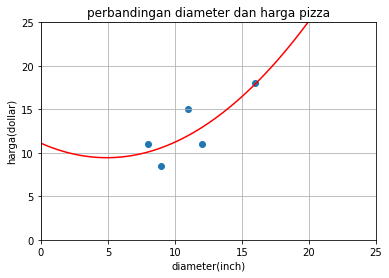

In [13]:
import matplotlib.pyplot as c
x_vis = b.linspace(0, 25, 100).reshape(-1, 1)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)
c.scatter(x_train, y_train)
c.plot(x_vis, y_vis_quadratic, '-r')
c.title('perbandingan diameter dan harga pizza')
c.xlabel('diameter(inch)')
c.ylabel('harga(dollar)')
c.xlim(0, 25)
c.ylim(0, 25)
c.grid(True)
c.show()

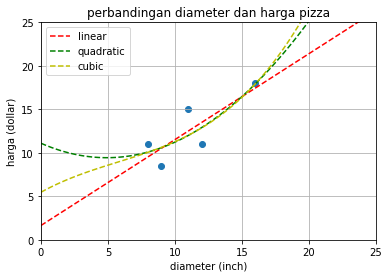

In [16]:
c.scatter(x_train, y_train)

model = LinearRegression()
model.fit(x_train, y_train)
x_vis = b.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(x_vis)
c.plot(x_vis, y_vis, '--r', label = 'linear')

quadratic_feature = PolynomialFeatures (degree = 2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)
c.plot(x_vis, y_vis, '--g', label = 'quadratic')

cubic_feature = PolynomialFeatures(degree = 3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_cubic, y_train)
x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)
c.plot(x_vis, y_vis, '--y', label = 'cubic')

c.title('perbandingan diameter dan harga pizza')
c.xlabel('diameter (inch)')
c.ylabel('harga (dollar)')
c.legend()
c.xlim(0, 25)
c.ylim(0, 25)
c.grid(True)
c.show()